In [3]:
import cameo

## Phenotypic Phase Plane 

In [4]:
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo import phenotypic_phase_plane

In [5]:
%run Scaffold_Y_lipo.ipynb

In [5]:
plotter = PlotlyPlotter()

In [6]:
#wt_solution = model.optimize()
#growth = wt_solution.fluxes["r_2111"] #Growth
#EPA_production = wt_solution.fluxes["DM_Eicosapentaenoic_Acid"]

In [7]:
#p = phenotypic_phase_plane(model, variables=['r_2111'], objective='DM_Eicosapentaenoic_Acid')
#p.plot(plotter, points=[(growth, EPA_production)])

In [8]:
# This is basically a plot of how the growth (r_2111) will follow the production of EPA (i think)

## Another stab at phenotypic phase plane

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cobra.io import read_sbml_model
from cobra.flux_analysis import production_envelope
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import matplotlib.pyplot as plt
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [10]:
model.reactions.EX_glc__D_e

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x12457ae30
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-1.0
Upper bound,999999.0


In [11]:
glc_exchange = model.reactions.EX_glc__D_e
gly_exchange = model.reactions.EX_glyc_e #Glycerol
o2_exchange = model.reactions.EX_o2_e
growth = model.reactions.BIOMASS_SC4_bal

medium = model.medium

#Amping glucose levels to 1000.0
medium['EX_o2_e'] = 700
model.reactions.EX_glc__D_e.bounds = -1000, 0

In [ ]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

<Axes: xlabel='Glycerol uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

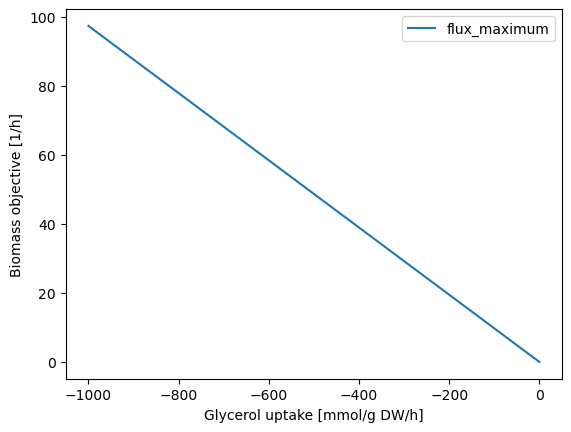

In [13]:
ppp_biomass.plot(x='EX_o2_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")

# OptGene

In [13]:
pip install Mapping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 1.9 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 4.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 6.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 36.1 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 3.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.1 MB/s eta 0:00:00:00:01
  Created wheel for Mapping: filename=mapping-0.1.6-py3-none-any.whl size=23664 sha256=131c28c9c09699b0ea6121e58d998092d9b251b6e818eb013afd46e8d737a1b3
  Stored in directory: /home/co

In [21]:
from cobra.manipulation.delete import find_gene_knockout_reactions

ImportError: cannot import name 'find_gene_knockout_reactions' from 'cobra.manipulation.delete' (/usr/local/python/3.10.8/lib/python3.10/site-packages/cobra/manipulation/delete.py)

In [8]:
pip install --upgrade bokeh==2.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 35.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:

from cameo.strain_design import OptGene
optgene = OptGene(model)

ImportError: cannot import name 'find_gene_knockout_reactions' from 'cobra.manipulation.delete' (/usr/local/python/3.10.8/lib/python3.10/site-packages/cobra/manipulation/delete.py)

In [17]:
import logging
# Set the logging level to ignore Bokeh warnings
logging.getLogger("bokeh").setLevel(logging.ERROR)

In [18]:
result = optgene.run(target=model.reactions.DM_Eicosapentaenoic_Acid,
                     biomass=model.reactions.BIOMASS_SC4_bal,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=5000,
                     plot=True)


Starting optimization at Wed, 29 Nov 2023 21:59:58


/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 1), ('y', 0)



HBox()

/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 2), ('y', 1)

/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 3), ('y', 2)

/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 4), ('y', 3)

/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 5), ('y', 4)

/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 6), ('y', 5)

/Users/emil/anaconda3/lib/python3.10/site-pac

Finished after 00:02:53


/Users/emil/anaconda3/lib/python3.10/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 26), ('y', 25)



In [20]:
print("Length of x:", len(x_data))
print("Length of y:", len(y_data))

# Create ColumnDataSource
source = ColumnDataSource(data=dict(x=x_data, y=y_data))

NameError: name 'x_data' is not defined

In [ ]:
result = optgene.run(...)  # Assuming you have an OptGeneResult object
print(dir(result))

In [ ]:
result

## OptKnock

In [21]:
from cameo.strain_design import OptKnock
from cameo.strain_design import OptGene

In [ ]:
optknock = OptKnock(model, fraction_of_optimum=0.05)
result = optknock.run(max_knockouts=2, target="DM_Eicosapentaenoic_Acid", biomass="BIOMASS_SC4_bal")
result

/Users/emil/anaconda3/lib/python3.10/site-packages/cameo/strain_design/deterministic/linear_programming.py:118: UserWarning:

You are trying to run OptKnock with glpk_interface. This might not end well.



In [ ]:
results